In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier


# Plotting style
sns.set_style('darkgrid')
sns.set_theme(font_scale=1.)

# Define parameters
seed = 1234

In [2]:
# Initial data cleaning
df = pd.read_csv('data/SAHeart.csv')
df['chd'] = pd.Categorical(df['chd'])
df['famhist'] = pd.Categorical(df['famhist'].map({'Absent':0, 'Present':1})) # One-of-K coding

# Filter outliers if we need to??
#df = df[~( (df[''] > 2) | (df[''] > 1) )]

df.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,1,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,0,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,1,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,1,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,1,60,25.99,57.34,49,1


Classification

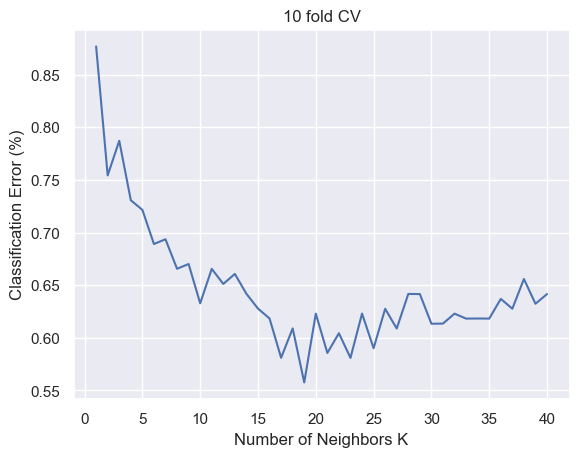

Best k = 19, CV error = 0.0056


In [ ]:
X = df.drop(columns=[ 'chd'])
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
# Target
y = df['chd'] 


K_neighbours = 40  # Max neighbors
errors = np.zeros((len(X), K_neighbours))

K = 10
# 2.2) Initialize 5-Fold Cross-Validation, save the object as CV_kfold
CV_kfold = KFold(n_splits=K, shuffle=True, random_state=seed)

# Loop through the folds
for fold, (train_index, test_index) in enumerate(CV_kfold.split(X)):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    for k in range(1, K_neighbours + 1):
        knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(X_train, y_train)
        
        y_pred = knn_model.predict(X_test)

        # Classification error for this fold
        errors[fold, k - 1] = np.mean(y_pred != y_test)

# Plot mean errors for each K
mean_errors = np.mean(errors, axis=0)
f = plt.figure()
plt.title('10 fold CV')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Classification Error (%)')
plt.plot(range(1, K_neighbours + 1), mean_errors * 100)
plt.grid(True)
plt.show()

idx = int(np.argmin(mean_errors))     
best_k = idx + 1
best_err = mean_errors[idx]

print(f"Best k = {best_k}, CV error = {best_err:.4f}")